## **Setup the environment**

In [1]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'LoRaSim/requirements.txt'


--2025-04-23 18:05:22--  https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
Resolving www.lancaster.ac.uk (www.lancaster.ac.uk)... 148.88.65.80, 2001:630:80:2ff::80:1
Connecting to www.lancaster.ac.uk (www.lancaster.ac.uk)|148.88.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112640 (110K) [application/x-gzip]
Saving to: ‘lorasim-20170710.tgz.1’

lorasim-20170710.tg 100%[===================>] 110.00K  --.-KB/s    in 0.05s   

2025-04-23 18:05:22 (2.10 MB/s) - ‘lorasim-20170710.tgz.1’ saved [112640/112640]

lorasim/
lorasim/loraDir.py
lorasim/loraDirMulBS.py
lorasim/oneDirectionalLoraIntf.py
lorasim/requirements.txt
lorasim/directionalLoraIntf.py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python2 is already the newest version (2.7.18-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
         

## **Play with the simulator**

### **Import libraries**

In [2]:
!pip install simpy
!pip install numpy
!pip install matplotlib

In [14]:
import os
import pandas as pd
import math
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import subprocess

### **Execute simulations**

In [18]:
def simulate(n_nodes, tx_rate, exp, duration):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDir.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

def simulate_n_baseStations(n_nodes, tx_rate, exp, duration, basestations):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDirMulBS.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(int(basestations)),
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

# Der in aloha defined as S/G = e^(-2G)
def aloha_der(n_nodes,t):
    rate = 1e-6
    return math.exp(-2 * n_nodes * rate * t)


In [7]:
duration = 86400000
tx_rate = 1e6

for n_nodes in list(range(1,10,1)) + list(range(10,300,10)) + list(range(300,1000,100)):
  print(f"Simulating {n_nodes} nodes")
  simulate(n_nodes, tx_rate, 0, duration)
  simulate(n_nodes, tx_rate, 2, duration)
  simulate(n_nodes, tx_rate, 3, duration)

Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 20 nodes
Simulating 30 nodes
Simulating 40 nodes
Simulating 50 nodes
Simulating 60 nodes
Simulating 70 nodes
Simulating 80 nodes
Simulating 90 nodes
Simulating 100 nodes
Simulating 110 nodes
Simulating 120 nodes
Simulating 130 nodes
Simulating 140 nodes
Simulating 150 nodes
Simulating 160 nodes
Simulating 170 nodes
Simulating 180 nodes
Simulating 190 nodes
Simulating 200 nodes
Simulating 210 nodes
Simulating 220 nodes
Simulating 230 nodes
Simulating 240 nodes
Simulating 250 nodes
Simulating 260 nodes
Simulating 270 nodes
Simulating 280 nodes
Simulating 290 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes
Simulating 1000 nodes
Simulating 1100 nodes
Simulating 1200 nodes
Simulating 1300 

In [36]:
data = pd.read_csv("exp0.dat", sep=" ")
data2 = pd.read_csv("exp2.dat", sep=" ")
data4 = pd.read_csv("exp4.dat", sep=" ")

In [12]:

data["der"] = (data["nrTransmissions"] - data["nrCollisions"]) / data["nrTransmissions"]
data["der_aloha"] = data["#nrNodes"].apply(lambda x: aloha_der(x,t=1712)) #7.07 1712 1318.91
data2["der"] = (data2["nrTransmissions"] - data2["nrCollisions"]) / data2["nrTransmissions"]
data4["der"] = (data4["nrTransmissions"] - data4["nrCollisions"]) / data4["nrTransmissions"]

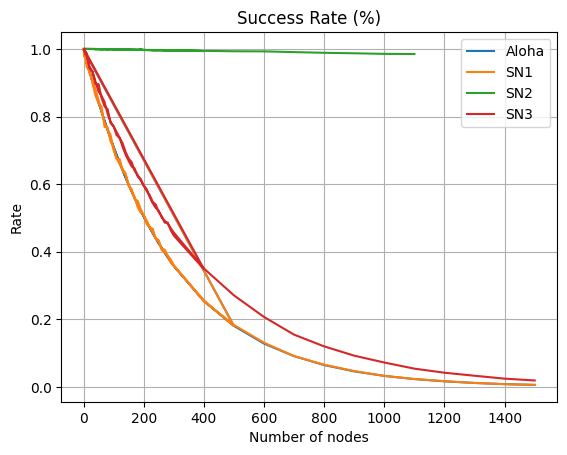

In [13]:
plt.plot(data["#nrNodes"], data["der_aloha"], label="Aloha")
plt.plot(data["#nrNodes"], data["der"], label="SN1")
plt.plot(data2["#nrNodes"], data2["der"], label="SN2")
plt.plot(data4["#nrNodes"], data4["der"], label="SN3")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

In [37]:
# FIGURE 5 simulation

duration = 86400000
tx_rate = 1e6

for n_nodes in list(range(1,10,1)) + list(range(10,300,10)) + list(range(300,1000,100)):
  print(f"Simulating {n_nodes} nodes")
  simulate(n_nodes, tx_rate, 4, duration)
  simulate(n_nodes, tx_rate, 3, duration)
  simulate(n_nodes, tx_rate, 5, duration)

Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 20 nodes
Simulating 30 nodes
Simulating 40 nodes
Simulating 50 nodes
Simulating 60 nodes
Simulating 70 nodes
Simulating 80 nodes
Simulating 90 nodes
Simulating 100 nodes
Simulating 110 nodes
Simulating 120 nodes
Simulating 130 nodes
Simulating 140 nodes
Simulating 150 nodes
Simulating 160 nodes
Simulating 170 nodes
Simulating 180 nodes
Simulating 190 nodes
Simulating 200 nodes
Simulating 210 nodes
Simulating 220 nodes
Simulating 230 nodes
Simulating 240 nodes
Simulating 250 nodes
Simulating 260 nodes
Simulating 270 nodes
Simulating 280 nodes
Simulating 290 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes


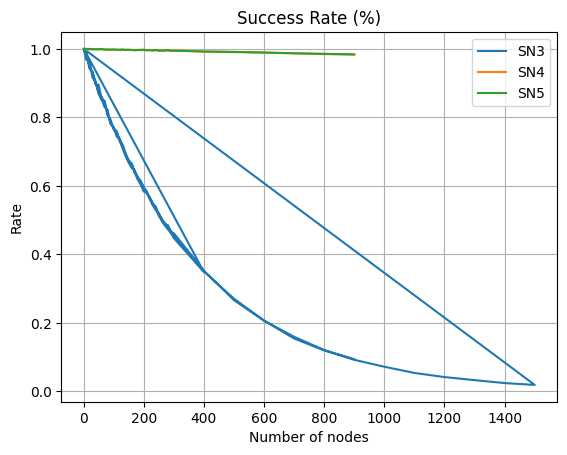

In [39]:
# FIGURE 5 data formatting and plotting

dataSN3 = pd.read_csv("exp4.dat", sep=" ")
dataSN4 = pd.read_csv("exp3.dat", sep=" ")
dataSN5 = pd.read_csv("exp5.dat", sep=" ")

dataSN3["der"] = (dataSN3["nrTransmissions"] - dataSN3["nrCollisions"]) / dataSN3["nrTransmissions"]
dataSN4["der"] = (dataSN4["nrTransmissions"] - dataSN4["nrCollisions"]) / dataSN4["nrTransmissions"]
dataSN5["der"] = (dataSN5["nrTransmissions"] - dataSN5["nrCollisions"]) / dataSN5["nrTransmissions"]

plt.plot(dataSN3["#nrNodes"], dataSN3["der"], label="SN3")
plt.plot(dataSN4["#nrNodes"], dataSN4["der"], label="SN4")
plt.plot(dataSN5["#nrNodes"], dataSN5["der"], label="SN5")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

In [34]:
# FIGURE 7 simulation

duration = 86400000
tx_rate = 1e6

for n_nodes in list(range(1,10,1)) + list(range(10,300,10)) + list(range(300,1000,100)):
  print(f"Simulating {n_nodes} nodes")

  #Do simulation, using SN1 and only changing number of Base Stations in the network
  simulate_n_baseStations(n_nodes, tx_rate, 0, duration, 1)
  simulate_n_baseStations(n_nodes, tx_rate, 0, duration, 2)
  simulate_n_baseStations(n_nodes, tx_rate, 0, duration, 3)
  simulate_n_baseStations(n_nodes, tx_rate, 0, duration, 4)
  simulate_n_baseStations(n_nodes, tx_rate, 0, duration, 8)
  simulate_n_baseStations(n_nodes, tx_rate, 0, duration, 24)

Simulating 1 nodes
Simulating 2 nodes
Simulating 3 nodes
Simulating 4 nodes
Simulating 5 nodes
Simulating 6 nodes
Simulating 7 nodes
Simulating 8 nodes
Simulating 9 nodes
Simulating 10 nodes
Simulating 20 nodes
Simulating 30 nodes
Simulating 40 nodes
Simulating 50 nodes
Simulating 60 nodes
Simulating 70 nodes
Simulating 80 nodes
Simulating 90 nodes
Simulating 100 nodes
Simulating 110 nodes
Simulating 120 nodes
Simulating 130 nodes
Simulating 140 nodes
Simulating 150 nodes
Simulating 160 nodes
Simulating 170 nodes
Simulating 180 nodes
Simulating 190 nodes
Simulating 200 nodes
Simulating 210 nodes
Simulating 220 nodes
Simulating 230 nodes
Simulating 240 nodes
Simulating 250 nodes
Simulating 260 nodes
Simulating 270 nodes
Simulating 280 nodes
Simulating 290 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes


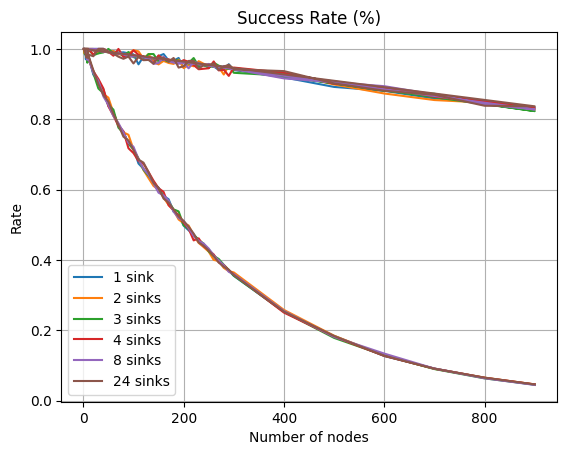

In [35]:
# FIGURE 7 data formatting and plotting

dataBS1 = pd.read_csv("exp0BS1.dat", sep=" ")
dataBS2 = pd.read_csv("exp0BS2.dat", sep=" ")
dataBS3 = pd.read_csv("exp0BS3.dat", sep=" ")
dataBS4 = pd.read_csv("exp0BS4.dat", sep=" ")
dataBS8 = pd.read_csv("exp0BS8.dat", sep=" ")
dataBS24 = pd.read_csv("exp0BS24.dat", sep=" ")

# For some reasons we need to replace (nrNodes -> #) and (DER -> nrNodes):

# plt.plot(dataBS1["nrNodes"], dataBS2["DER"], label="2 sinks")
plt.plot(dataBS1["#"], dataBS1["nrNodes"], label="1 sink")
plt.plot(dataBS2["#"], dataBS2["nrNodes"], label="2 sinks")
plt.plot(dataBS3["#"], dataBS3["nrNodes"], label="3 sinks")
plt.plot(dataBS4["#"], dataBS4["nrNodes"], label="4 sinks")
plt.plot(dataBS8["#"], dataBS8["nrNodes"], label="8 sinks")
plt.plot(dataBS24["#"], dataBS24["nrNodes"], label="24 sinks")
plt.title("Success Rate (%)")
plt.xlabel("Number of nodes")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()